Importing Libs

In [105]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

Merging Sales Data into one

In [14]:

files = [file for file in os.listdir('./SalesData')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesData/'+file)
    all_data = pd.concat([all_data, df])   
all_data.to_csv('all_data.csv', index=False)


Working With Merged Data

In [16]:
all_data = pd.read_csv('all_data.csv')
all_data.shape

(186850, 6)

Cleaning Data

In [28]:
# Checking for NaN values
all_data.isnull().values.any()

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

# Dropping all NaN values
all_data = all_data.dropna(how='all')

# Check to see all NaN Values are gone
all_data.isnull().values.any()

False

In [32]:
# Found that rows were being duplicated in colums
# Need to find them then drop them

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [50]:
# Convert Columns to correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#Adding Sales per order
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']


In [51]:
# Adding Month Column to Data
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


What was the best Month for Sales? How much was earned?

In [59]:
results =  all_data.groupby('Month').sum()
results

/var/folders/xj/0pv688096dzc6g1mx13k3vs40000gn/T/ipykernel_30173/824289474.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results =  all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


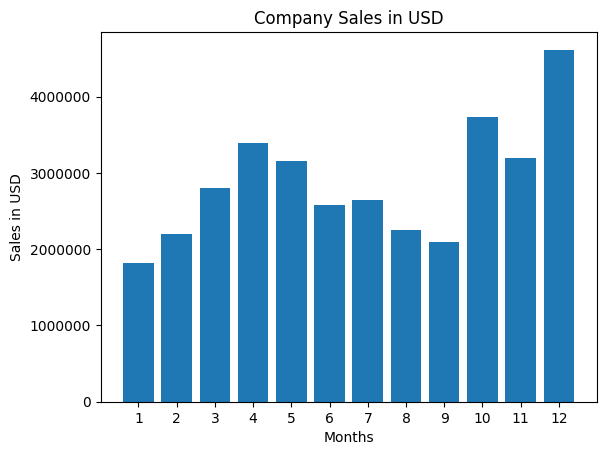

In [91]:
months = range(1,13)


plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')

plt.title('Company Sales in USD')

plt.ticklabel_format(style='plain')
plt.show()

What city had the highest number of sales?

In [121]:
# Adding citty column to extract certain data

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['Purchase Address'].apply(lambda x: ",".join(x[0].split()[1:]))
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' '+ get_state(x))

all_data = all_data.drop('State', axis=1)
all_data.head()

# cityList = all_data['City'].unique()

# citySales = all_data.groupby('City').sum()

# citySales


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


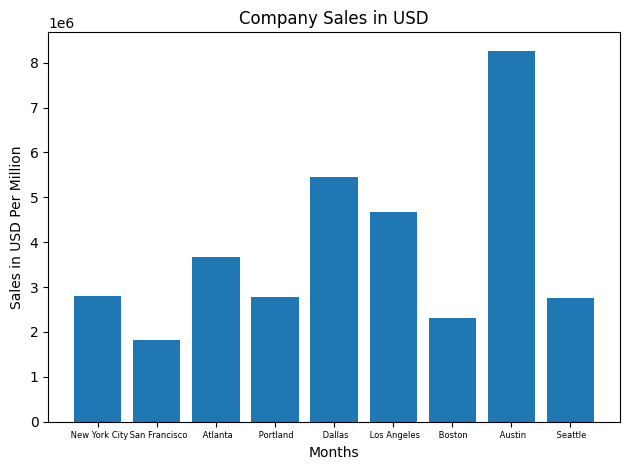

In [103]:
plt.bar(cityList, citySales['Sales'])
plt.xticks(cityList)
plt.ylabel('Sales in USD Per Million')
plt.xlabel('City')

plt.title('Company Sales in USD')

plt.tick_params(axis='x', which='major', labelsize=6)
plt.tight_layout()

plt.show()